In [2]:
HEART DISEASE PREDICTION PROJECT (DECISION TREE)


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
heartdf =pd.read_csv('C:\\Users\\imvv44\\Desktop\\Imarticus\\Decision Tree Project 28 12 22\\HeartDisease Decison tree Project.csv')
heartdf

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heartdf.shape

(303, 14)

In [10]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heartdf.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [12]:
heartdf.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
heartdf.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [14]:
num_cols = list(heartdf.columns[0:len(heartdf.columns)-1])
num_cols.remove('gender')

# EDA

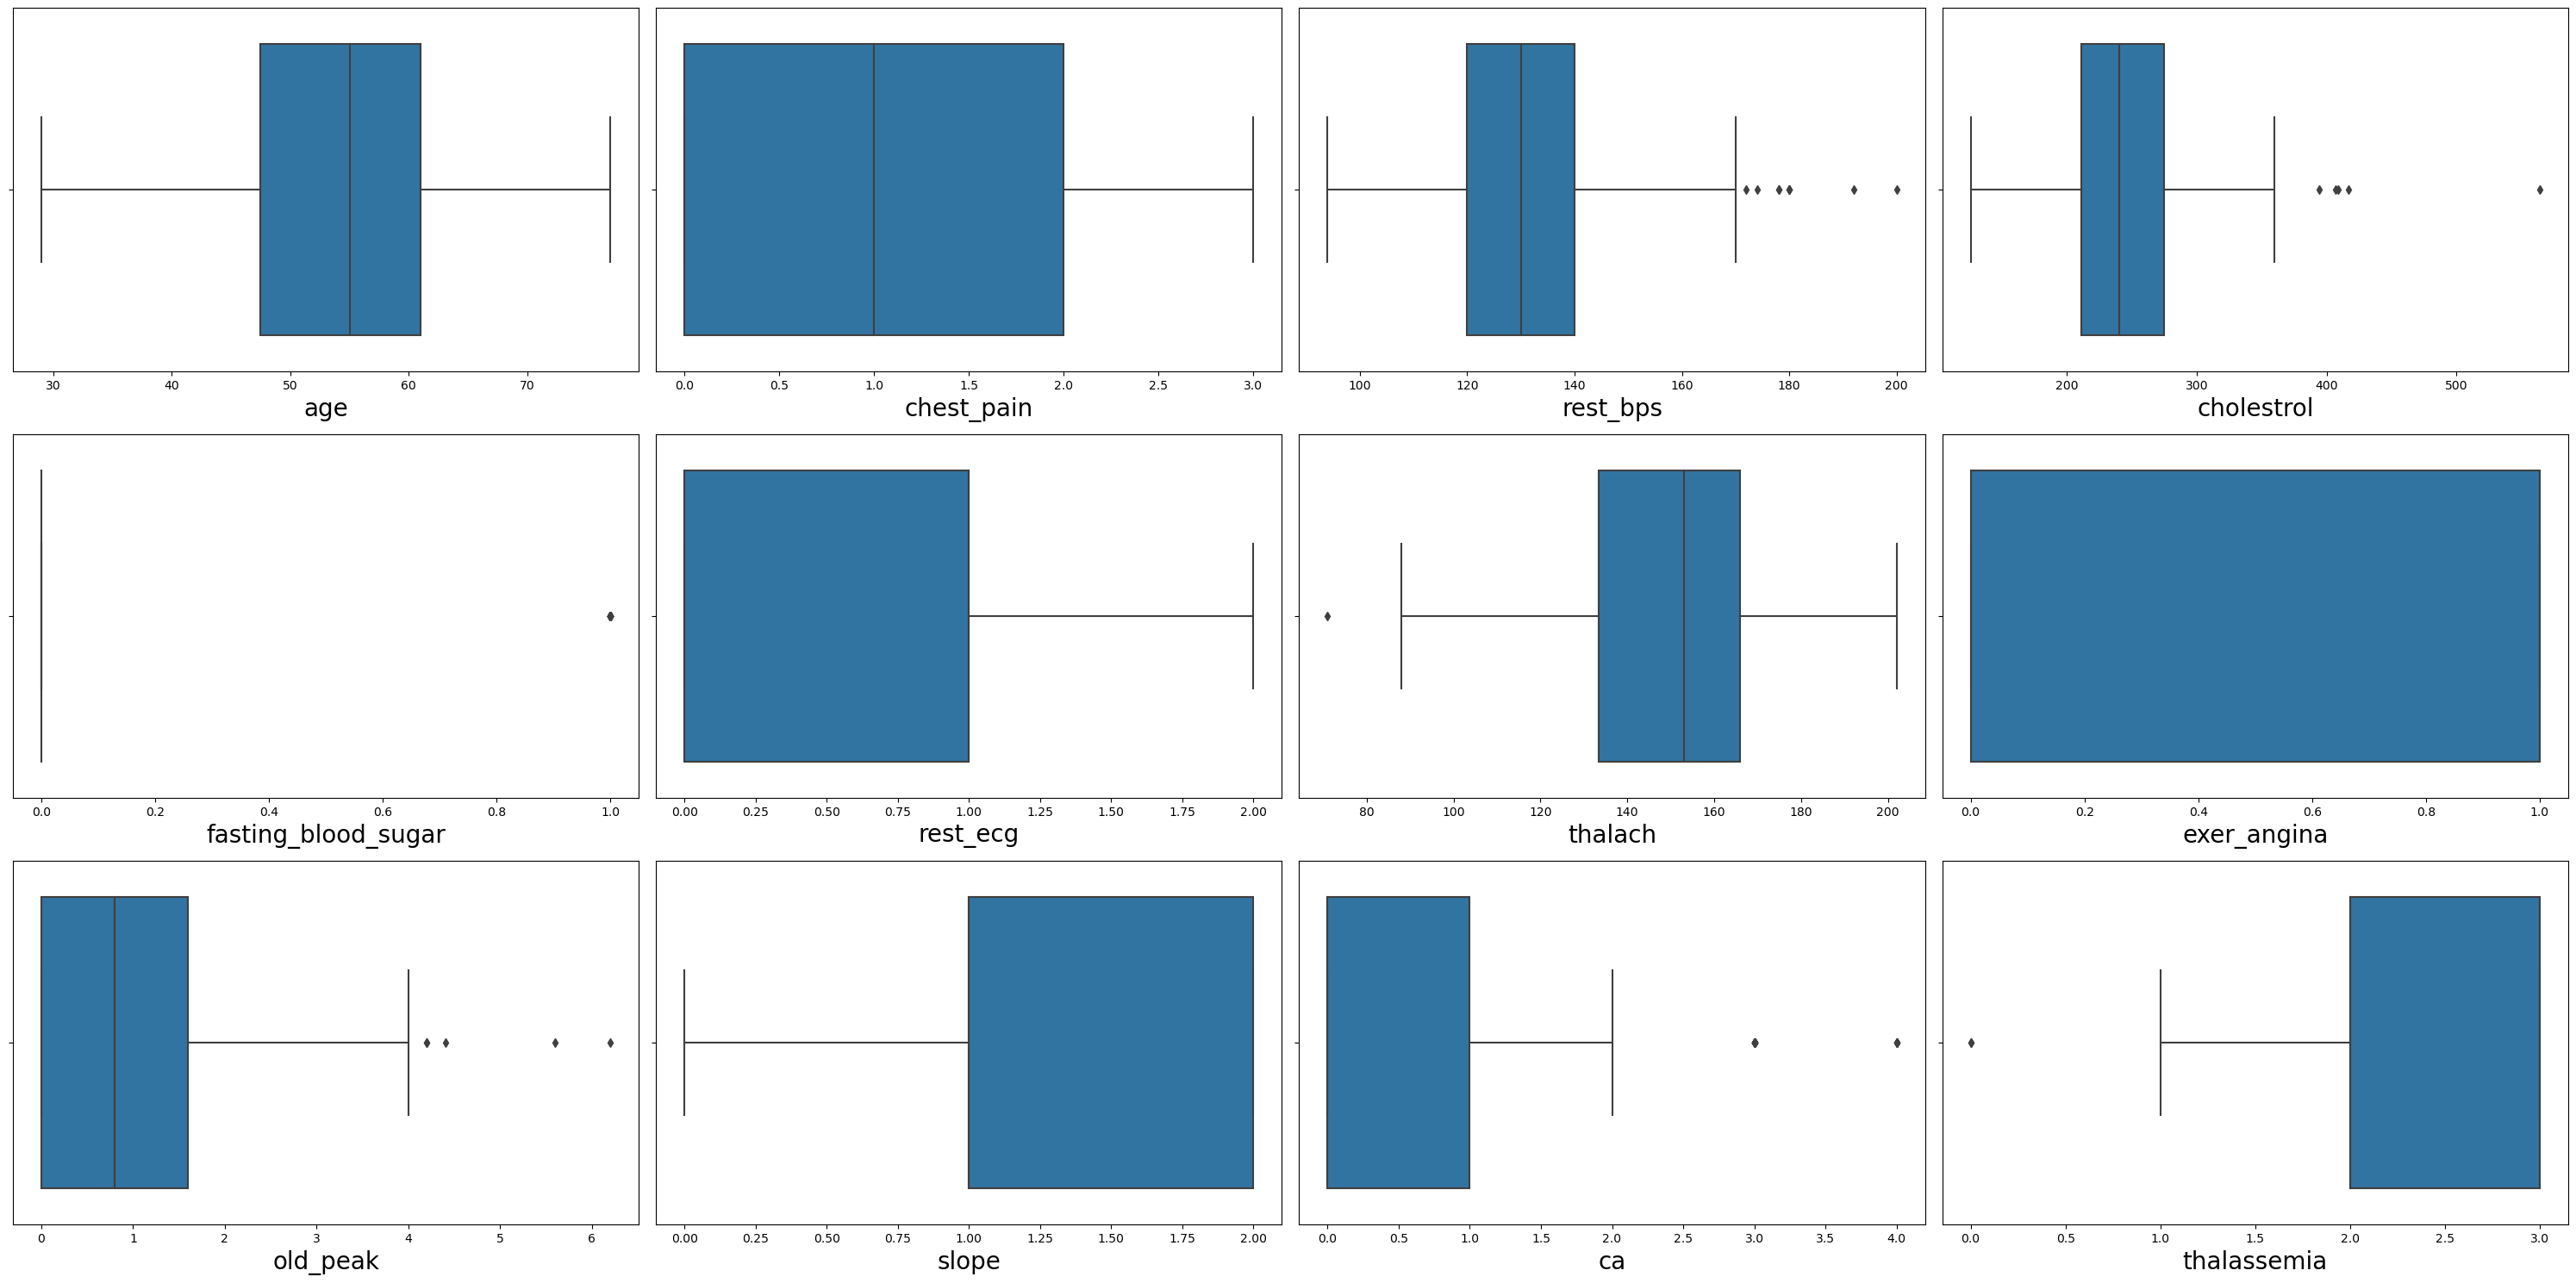

In [15]:
plt.figure(figsize=(30,15))
for i in enumerate(num_cols):
    plt.subplot(3,4,i[0]+1)
    ax = sns.boxplot(heartdf[i[1]])
    ax.set_xlabel(i[1],fontsize=20)

plt.tight_layout()
plt.show()


In [16]:
heartdf.nunique(axis=0)

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

In [17]:
fig = plt.figure(figsize = (25, 8))


<Figure size 2500x800 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of cholestrol by target')

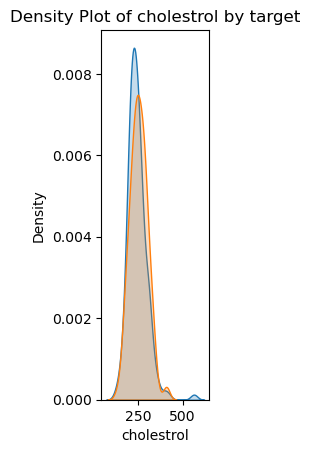

In [28]:
for i in heartdf["target"].unique():
    
    x = heartdf[heartdf["target"] == i]["cholestrol"]

    plt.subplot(1,4,1)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))


plt.title("Density Plot of cholestrol by target")


Text(0.5, 1.0, 'Density Plot of restbps by target')

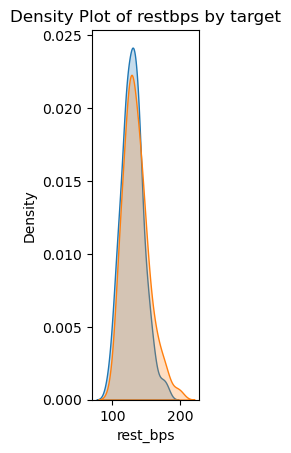

In [29]:
for i in heartdf["target"].unique():
    x = heartdf[heartdf["target"] == i]["rest_bps"]
    x = heartdf[heartdf["target"] == i]["rest_bps"]
    
    plt.subplot(1,4,2)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

    
plt.title("Density Plot of restbps by target")

Text(0.5, 1.0, 'Density Plot of thalach by target')

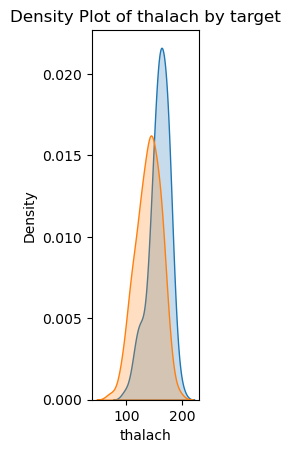

In [20]:
for i in heartdf["target"].unique():
    
    x = heartdf[heartdf["target"] == i]["thalach"]
   
    plt.subplot(1,4,3)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))


plt.title("Density Plot of thalach by target")




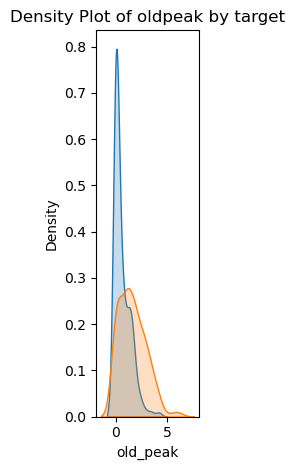

In [21]:
for i in heartdf["target"].unique():
    
    x = heartdf[heartdf["target"] == i]["old_peak"]
   
    plt.subplot(1,4,4)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))


plt.title("Density Plot of oldpeak by target")

plt.tight_layout()
plt.show()

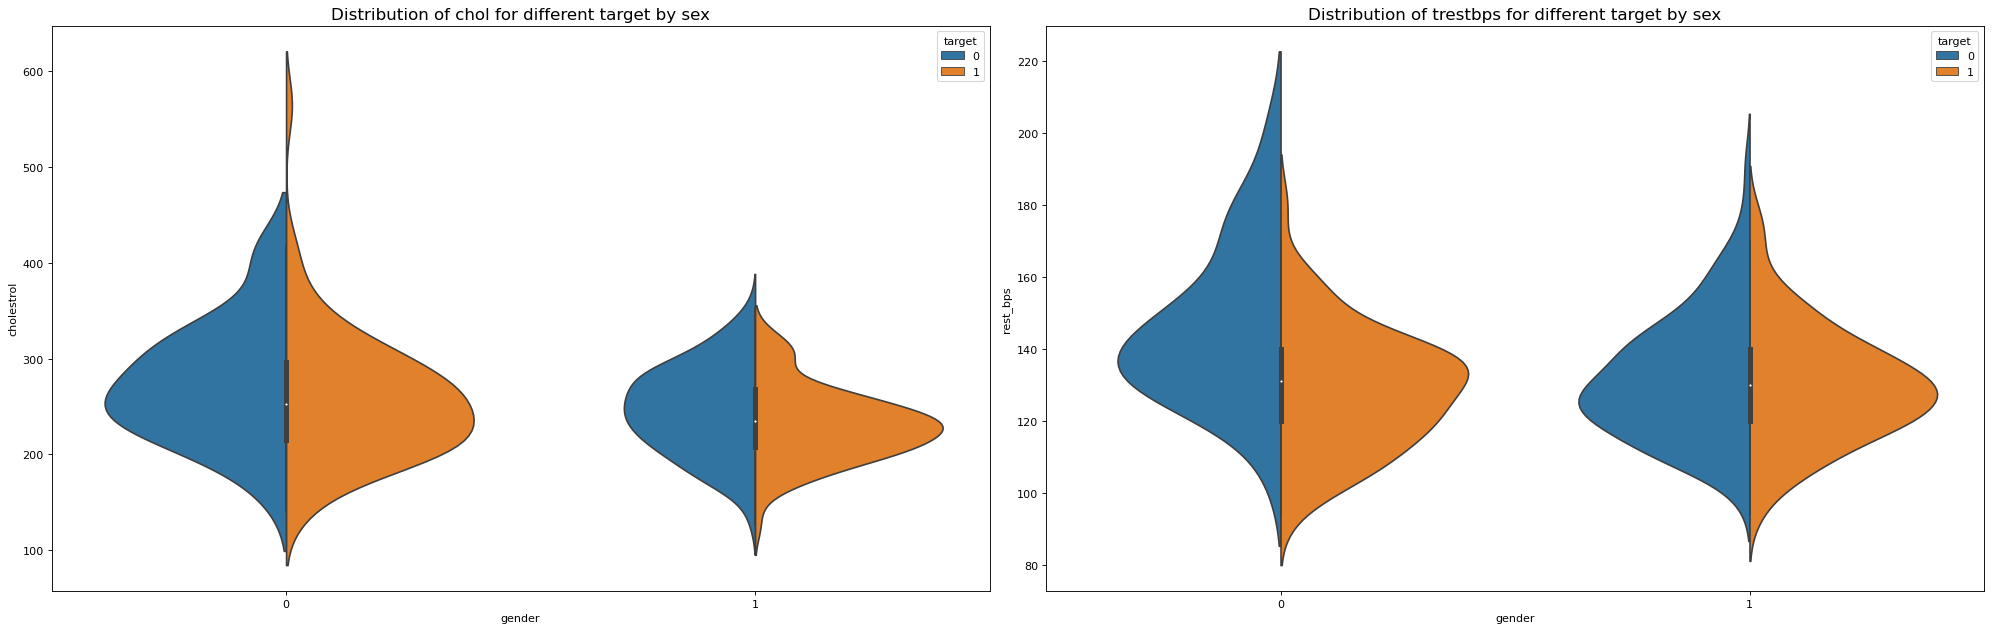

In [22]:
plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "gender", y = "cholestrol", hue = "target", split = True, data = heartdf)
ax.set_title('Distribution of chol for different target by sex', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "gender", y = "rest_bps", hue = "target", split = True, data = heartdf)
ay.set_title('Distribution of trestbps for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

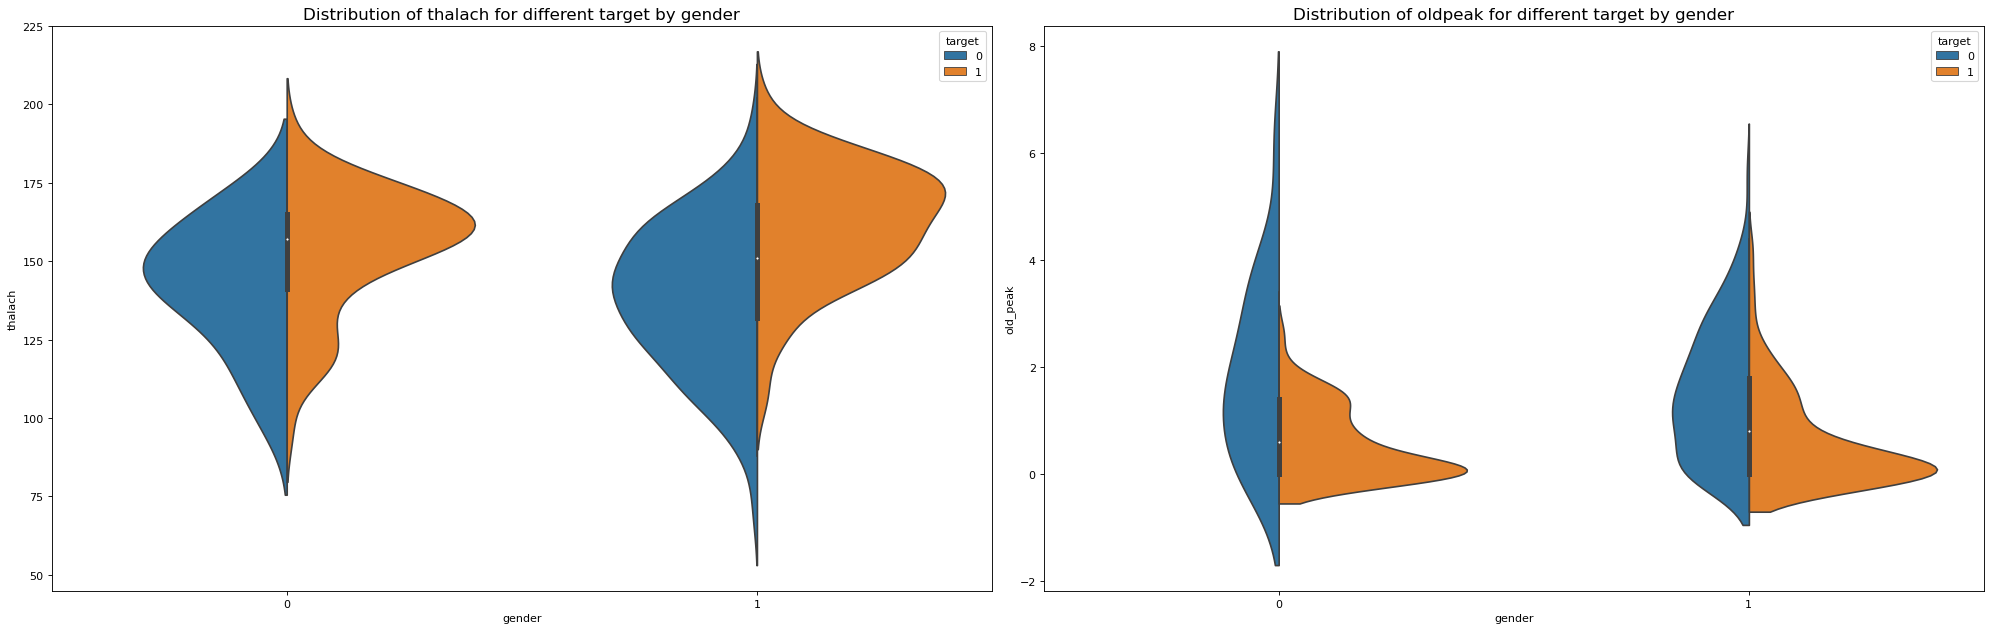

In [23]:
plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "gender", y = "thalach", hue = "target", split = True, data = heartdf)
ax.set_title('Distribution of thalach for different target by gender', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "gender", y = "old_peak", hue = "target", split = True, data = heartdf)
ay.set_title('Distribution of oldpeak for different target by gender', fontsize = 15)

plt.tight_layout()
plt.show()


In [24]:
cat_cols = ['gender','ca','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalach']

In [25]:
heart_des = heartdf[heartdf['target']==1]
heart_notdes = heartdf[heartdf['target']==0]

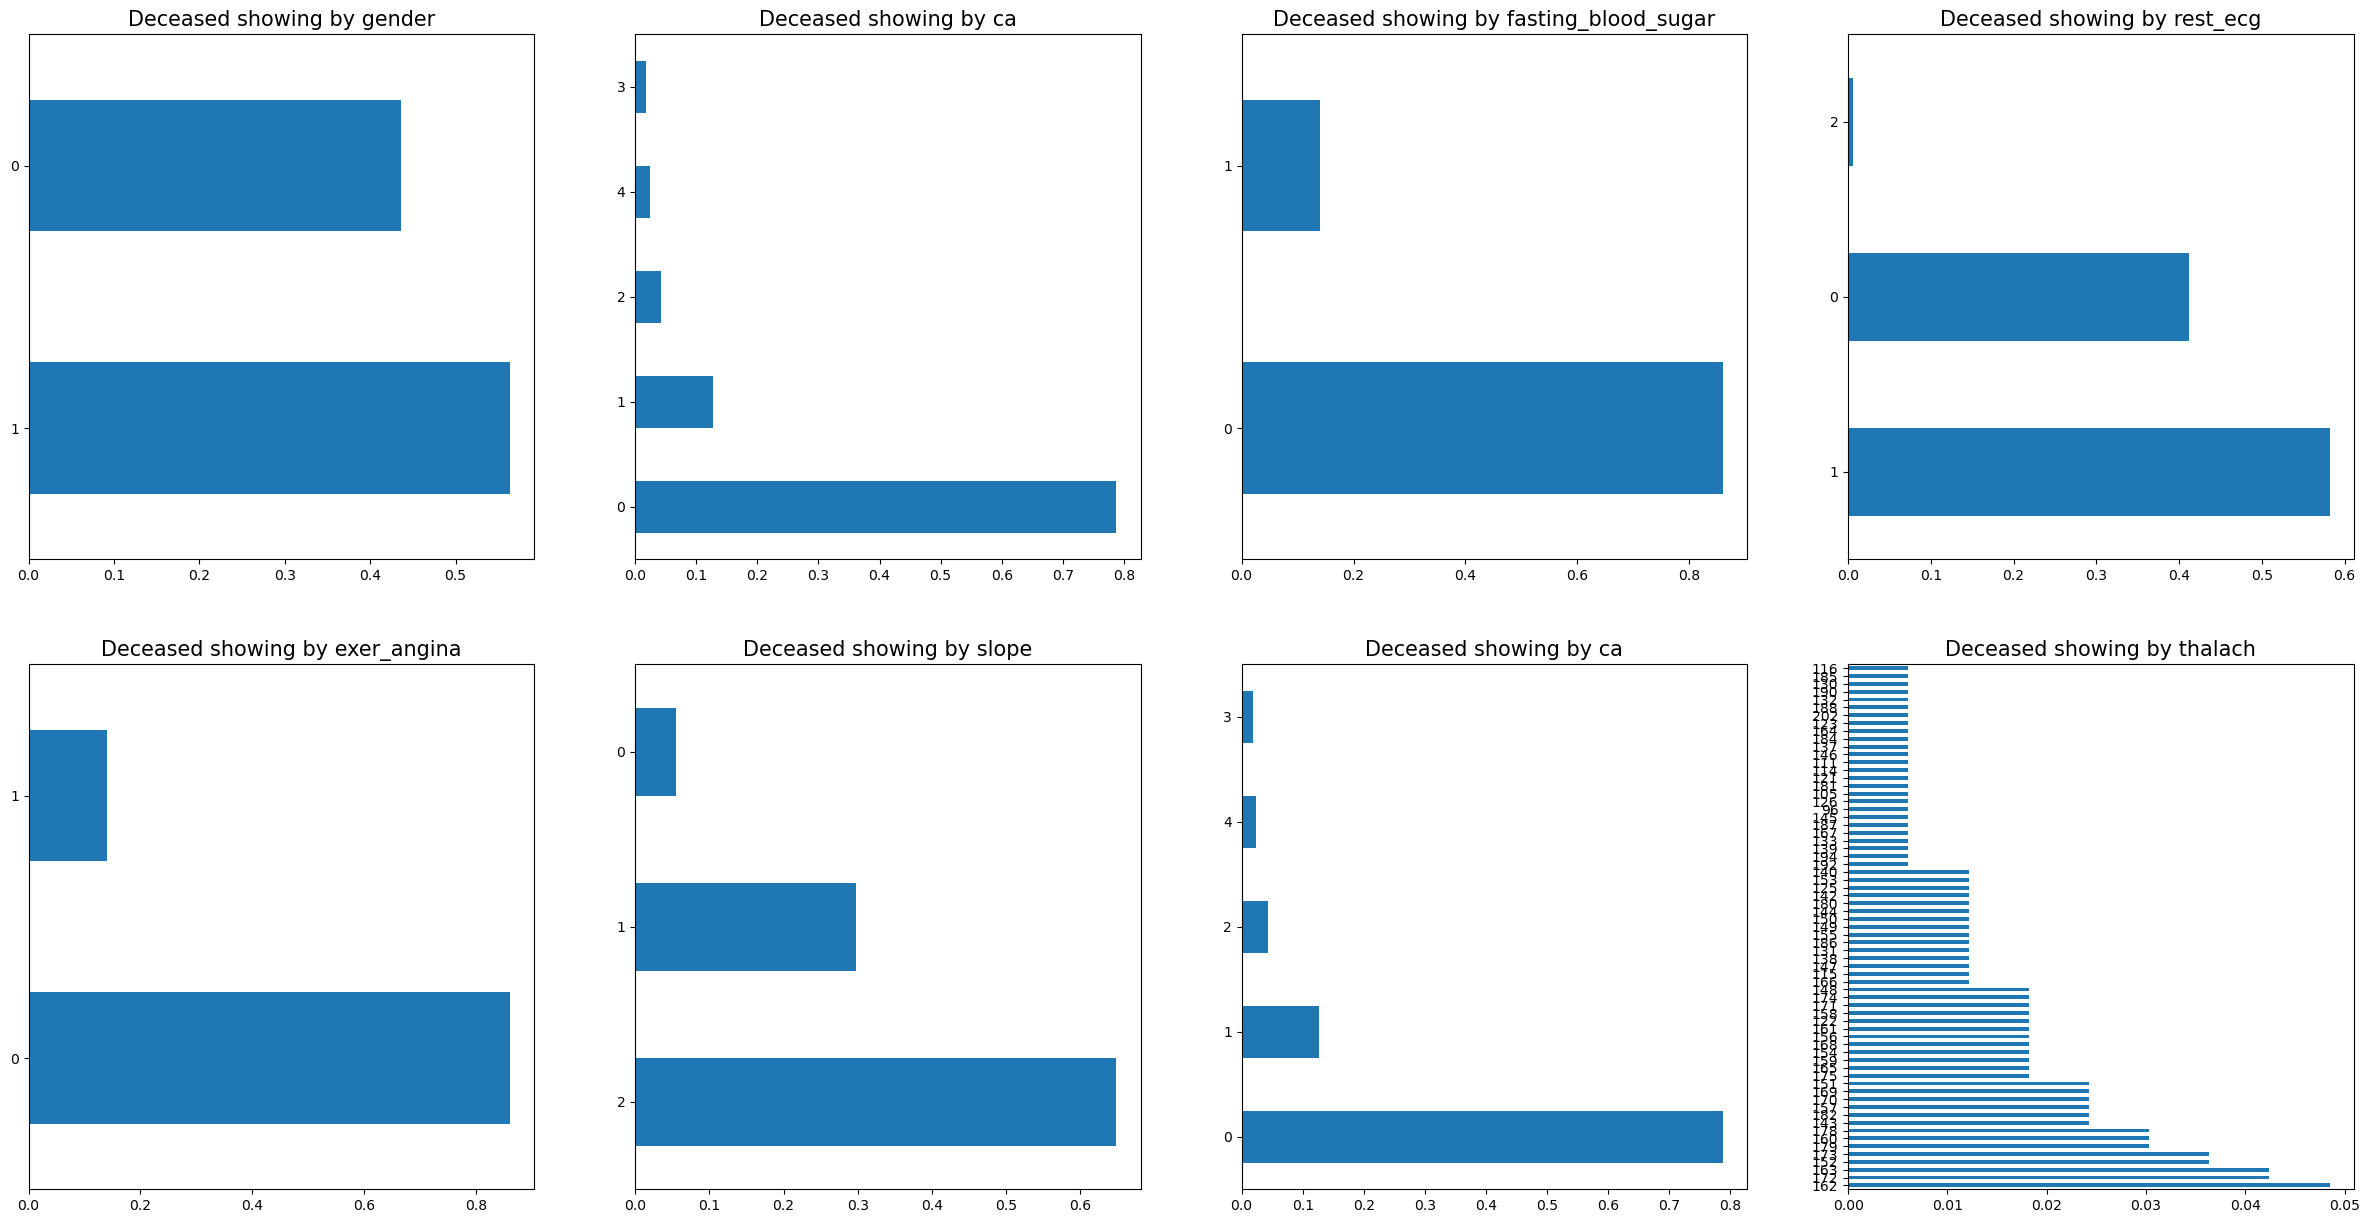

In [26]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_des[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Deceased showing by "+i[1],fontsize=15)
plt.show()

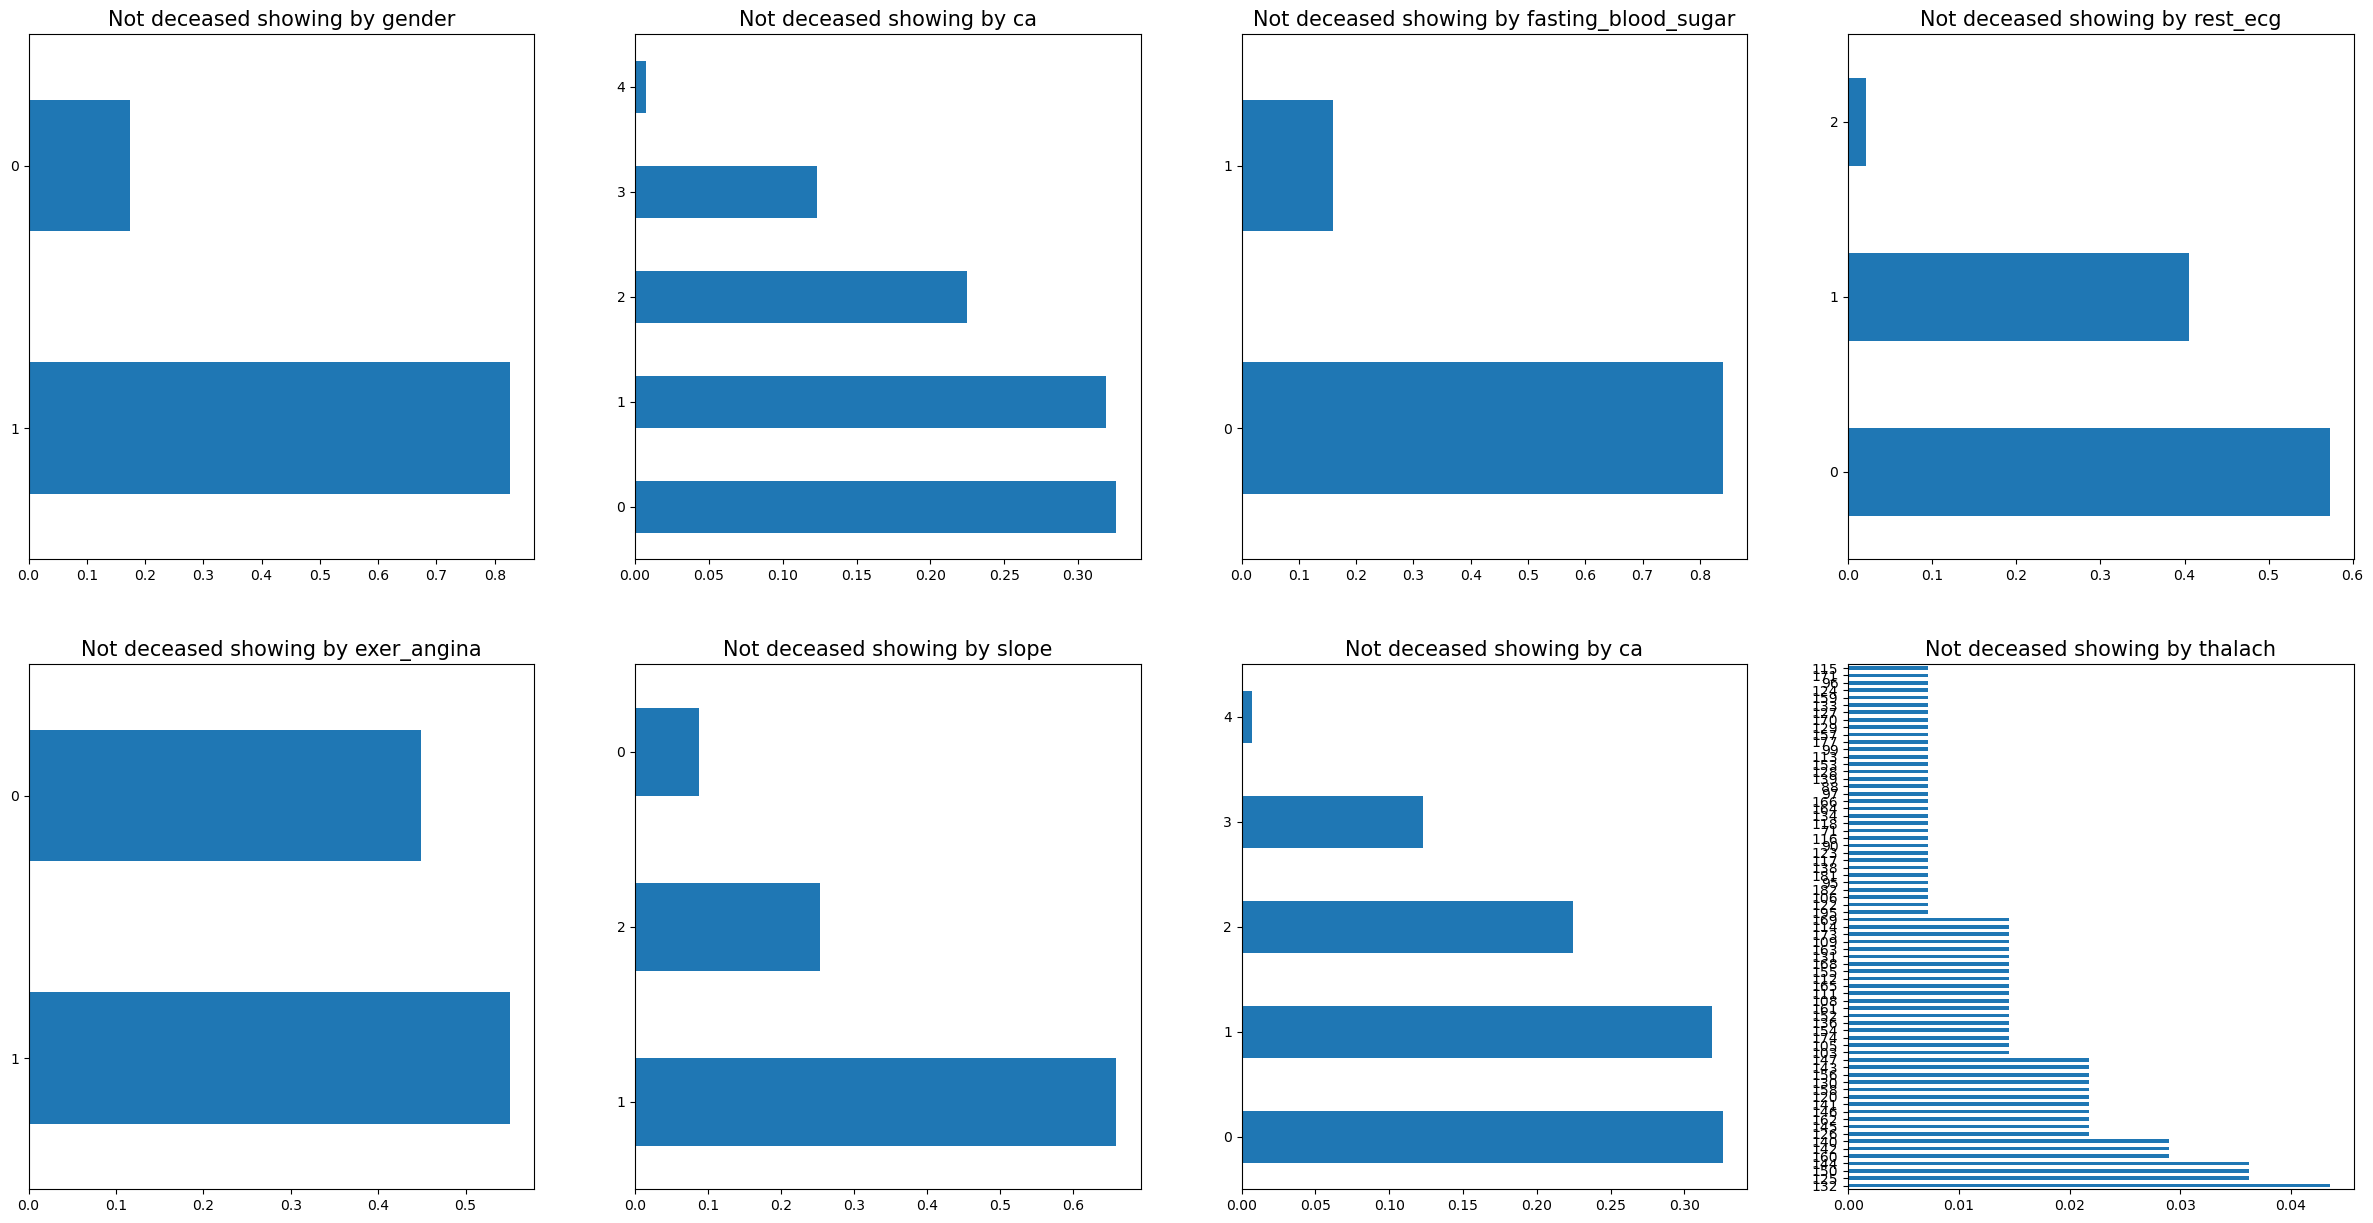

In [27]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_notdes[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Not deceased showing by "+i[1],fontsize=15)
plt.show()


# Model Building


In [30]:
#divide train and test set

In [31]:
df_train,df_test = train_test_split(heartdf,train_size=0.7,random_state=50)

In [32]:
y_train = df_train.pop('target')
X_train = df_train

In [37]:
y_test = df_test.pop('target')
X_test = df_test

In [38]:
#create function for check train and  test set 

In [39]:
def check_model(dt):
    print("train confusion matrix : ",confusion_matrix(y_train,dt.predict(X_train)))
    print("train accuracy score : ",accuracy_score(y_train,dt.predict(X_train)))
    print("__"*50)
    print("test confusion matrix : ",confusion_matrix(y_test,dt.predict(X_test)))
    print("test accuracy score : ",accuracy_score(y_test,dt.predict(X_test)))    
    

In [40]:
dt_default = DecisionTreeClassifier(random_state=0)
dt_res = dt_default.fit(X_train,y_train)

In [41]:
check_model(dt_res)

train confusion matrix :  [[ 99   0]
 [  0 113]]
train accuracy score :  1.0
____________________________________________________________________________________________________
test confusion matrix :  [[26 13]
 [ 9 43]]
test accuracy score :  0.7582417582417582


In [42]:
#create function for check train and test set


In [43]:
def check_model(dt):
    print("train confusion matrix : ",confusion_matrix(y_train,dt.predict(X_train)))
    print("train accuracy score : ",accuracy_score(y_train,dt.predict(X_train)))
    print("__"*50)
    print("test confusion matrix : ",confusion_matrix(y_test,dt.predict(X_test)))
    print("test accuracy score : ",accuracy_score(y_test,dt.predict(X_test)))    
    

In [44]:
dt_default = DecisionTreeClassifier(random_state=0)
dt_res = dt_default.fit(X_train,y_train)

In [45]:
check_model(dt_res)

train confusion matrix :  [[ 99   0]
 [  0 113]]
train accuracy score :  1.0
____________________________________________________________________________________________________
test confusion matrix :  [[26 13]
 [ 9 43]]
test accuracy score :  0.7582417582417582


In [46]:
def tree_graph(dt):

    fig = plt.figure(figsize=(25,20))

    dt_plot = tree.plot_tree(dt,feature_names=X_train.columns,class_names=['Not Deceased','Deceased'],filled=True)

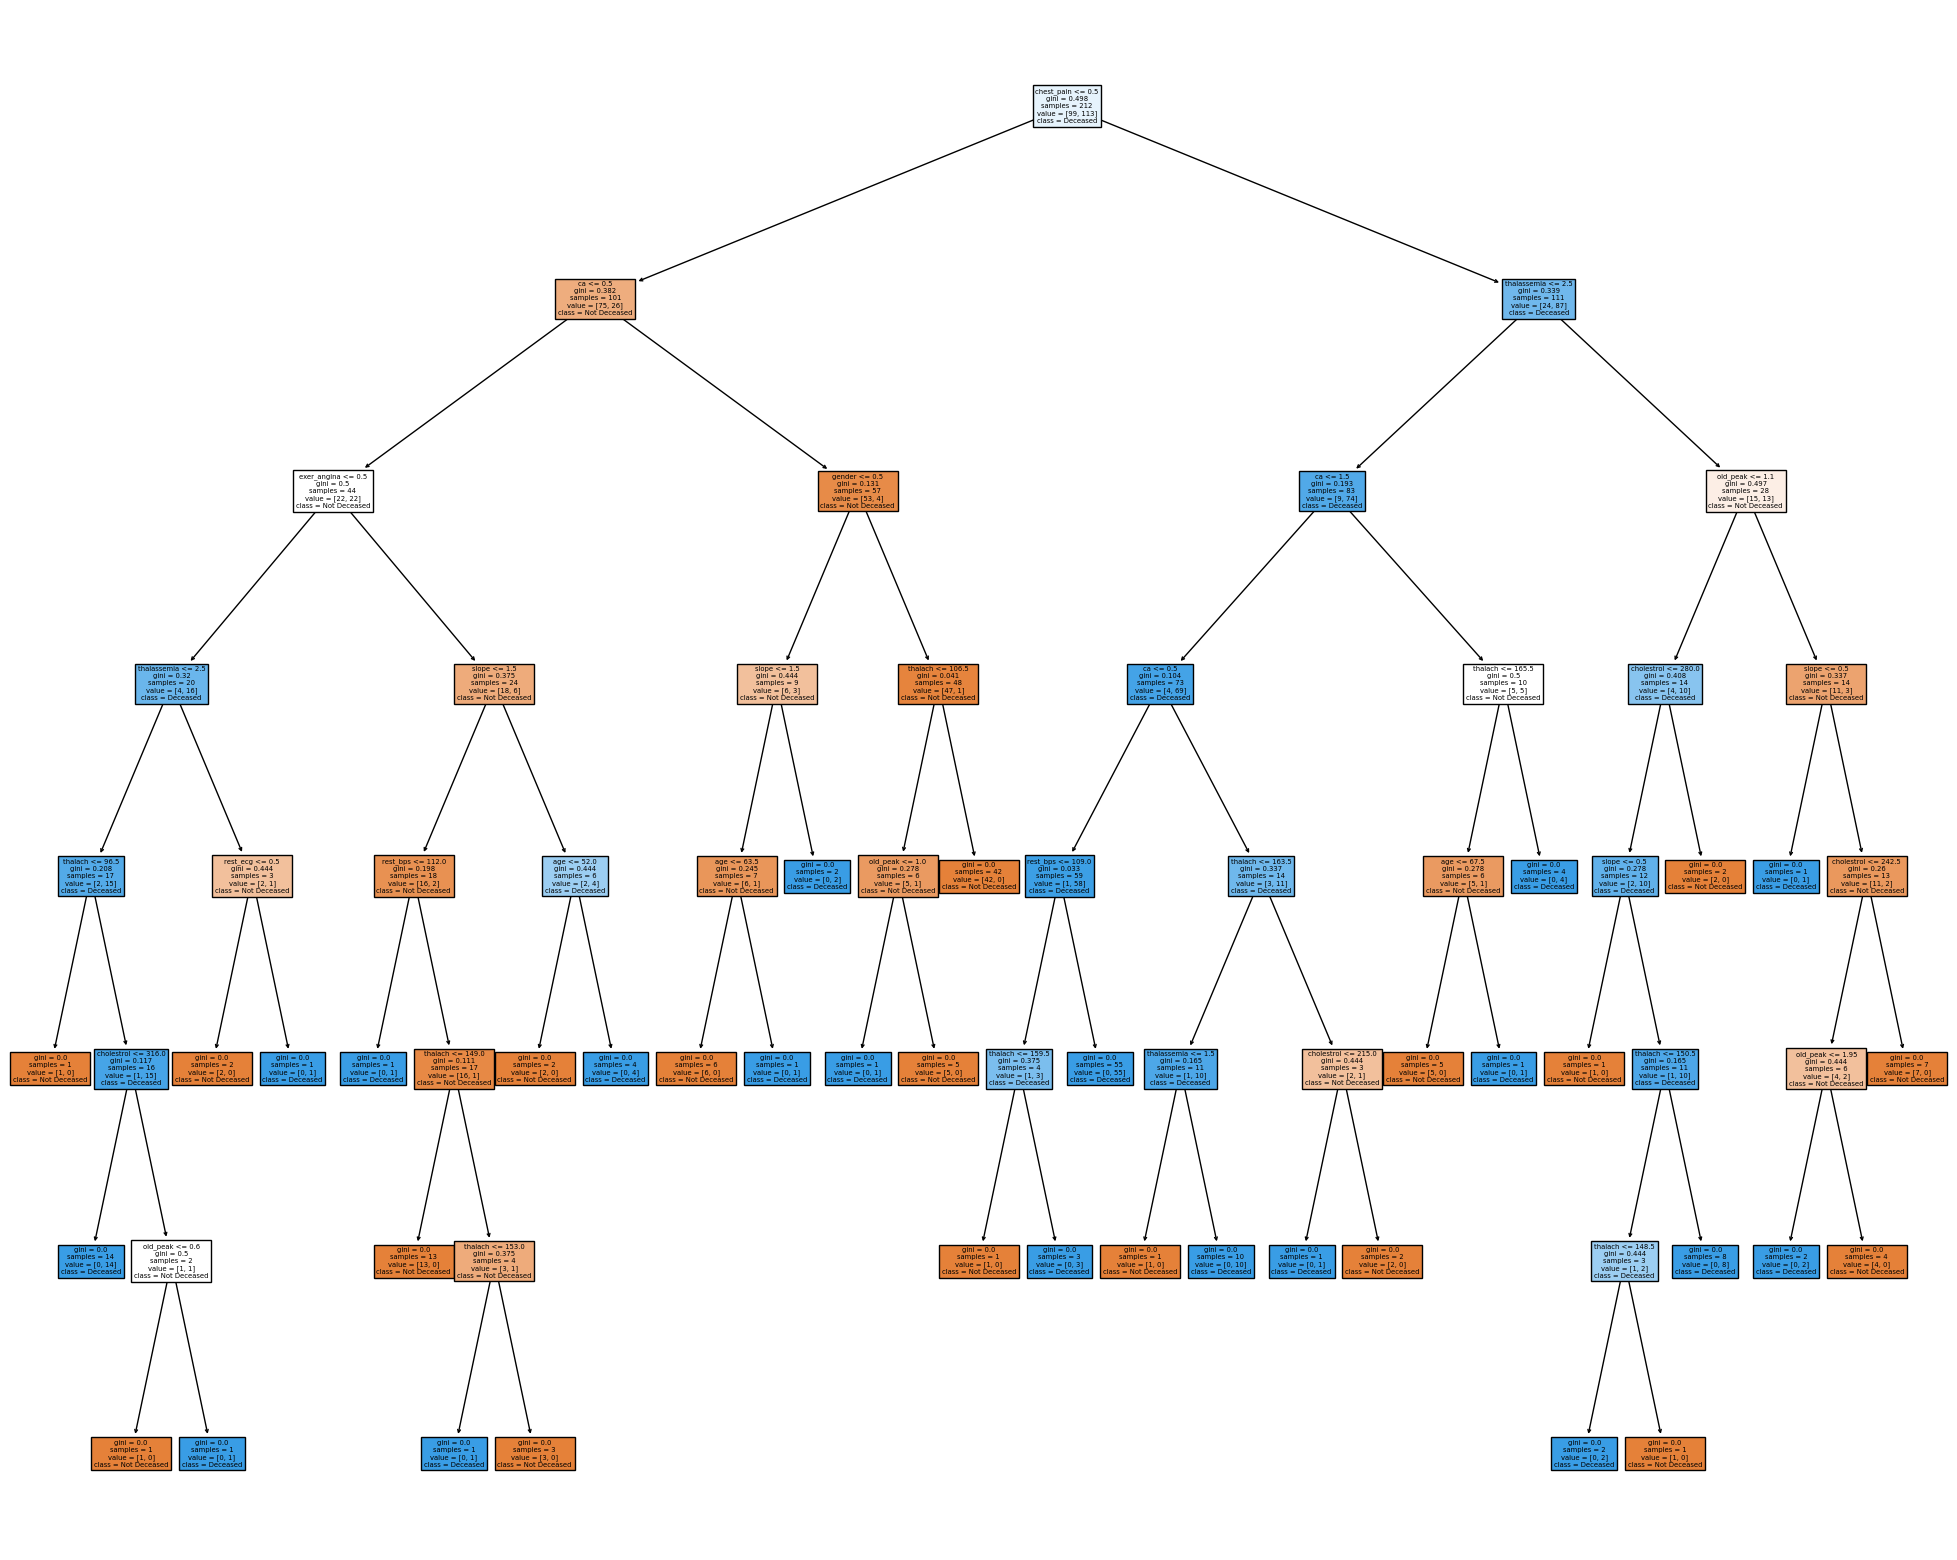

In [47]:
tree_graph(dt_res)